# Diabetes prediction

https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

| Column              | Description                           |
   |---------------------|---------------------------------------|
   | gender              | Gender of the patient                 |
   | age                 | Age of the patient                    |
   | hypertension        | Presence of hypertension (1: Yes, 0: No) |
   | heart_disease       | Presence of heart disease (1: Yes, 0: No) |
   | smoking_history     | Smoking history of the patient        |
   | bmi                 | Body Mass Index (BMI) of the patient   |
   | HbA1c_level         | Hemoglobin A1c level                  |
   | blood_glucose_level | Blood glucose level                   |
   | diabetes            | Diabetes status (1: Positive, 0: Negative) |

In [165]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

In [166]:
data = pd.read_csv('diabetes_prediction_dataset.csv')
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [168]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [169]:
data.duplicated().value_counts()

False    96146
True      3854
Name: count, dtype: int64

In [170]:
data = data.drop_duplicates()

In [171]:
data.duplicated().value_counts()

False    96146
Name: count, dtype: int64

In [172]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


### What is BMI?
- A measure of body fat based on weight and height.
- __Categorized as__:
  - Underweight: BMI less than 18.5
  - Normal/Healthy weight: BMI 18.5 to 24.9
  - Overweight: BMI 25 to 29.9
  - Obese: BMI 30 or greater
- __General recommendations__:
  - Normal/Healthy BMI: 18.5 to 24.9
  - Target for good health.<br><br>

---
### What is HbA1c?
- A blood test measuring average blood glucose levels over the past 2-3 months usually expressed as percentage and it reflects the long-term blood sugar control, especially in diabetes.
- __General interpretation__:
  - Normal/Healthy: Below 5.7%
  - Prediabetes: 5.7% to 6.4%
  - Diabetes: 6.5% and above.<br><br>

Regular HbA1c testing is crucial for managing diabetes and assessing overall blood sugar control. Consult with healthcare professionals for personalized guidance.

In [173]:
data.head() 

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [174]:
for column in data.columns:
    num_distinct_values = len(data[column].unique())
    print(f"{column} - {num_distinct_values} distinct values")

gender - 3 distinct values
age - 102 distinct values
hypertension - 2 distinct values
heart_disease - 2 distinct values
smoking_history - 6 distinct values
bmi - 4247 distinct values
HbA1c_level - 18 distinct values
blood_glucose_level - 18 distinct values
diabetes - 2 distinct values


In [175]:
data.gender.value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

In [176]:
data = data[data['gender'] != 'Other']

In [177]:
data.gender.value_counts()

gender
Female    56161
Male      39967
Name: count, dtype: int64

In [178]:
data.smoking_history.value_counts()

smoking_history
never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: count, dtype: int64

In [179]:
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

data['smoking_history'] = data['smoking_history'].apply(recategorize_smoking)

In [180]:
data.smoking_history.value_counts()

smoking_history
non-smoker     67276
past_smoker    19655
current         9197
Name: count, dtype: int64

### Data Visualization

In [181]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,non-smoker,25.19,6.6,140,0
1,Female,54.0,0,0,non-smoker,27.32,6.6,80,0
2,Male,28.0,0,0,non-smoker,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [182]:
for column in data.columns:
    num_distinct_values = len(data[column].unique())
    print(f"{column} - {num_distinct_values} distinct values")

gender - 2 distinct values
age - 102 distinct values
hypertension - 2 distinct values
heart_disease - 2 distinct values
smoking_history - 3 distinct values
bmi - 4247 distinct values
HbA1c_level - 18 distinct values
blood_glucose_level - 18 distinct values
diabetes - 2 distinct values


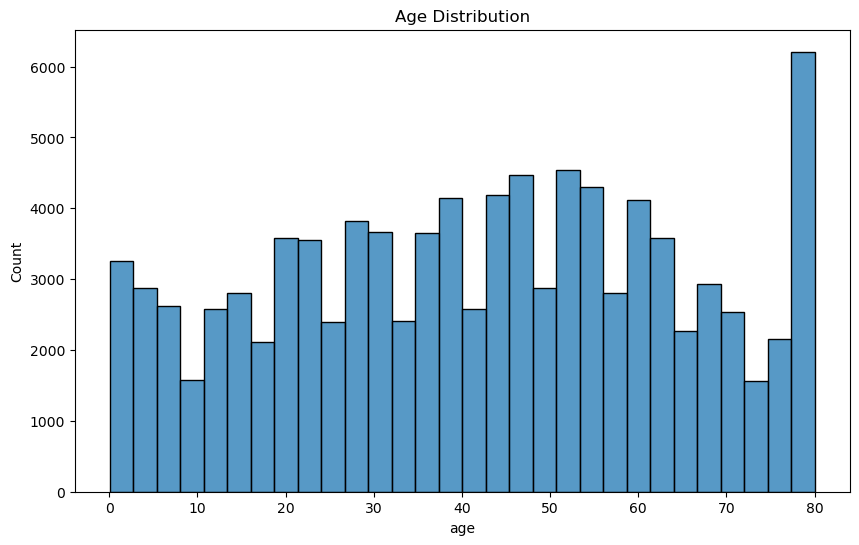

In [183]:
plt.figure(figsize=(10,6))
sns.histplot(x = 'age', data = data, bins=30)
plt.title("Age Distribution")
plt.show()

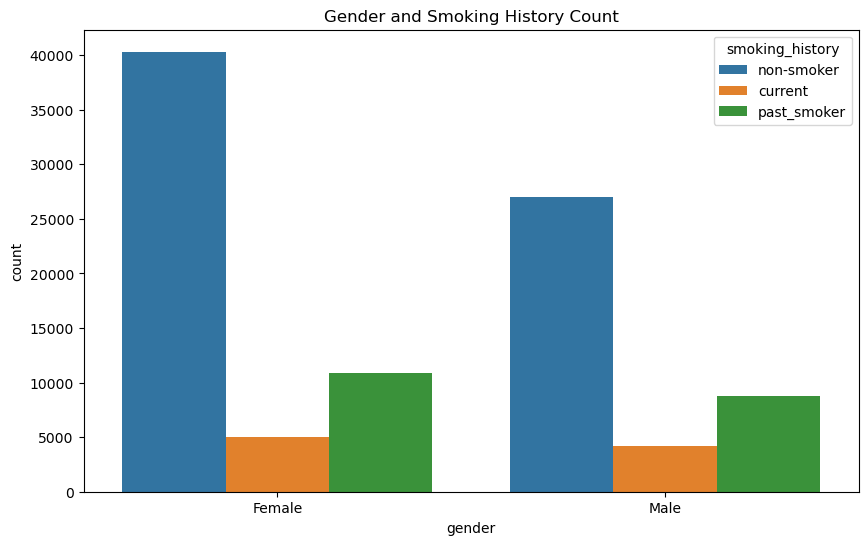

In [184]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'gender', data = data, hue='smoking_history')
plt.title("Gender and Smoking History Count")
plt.show()

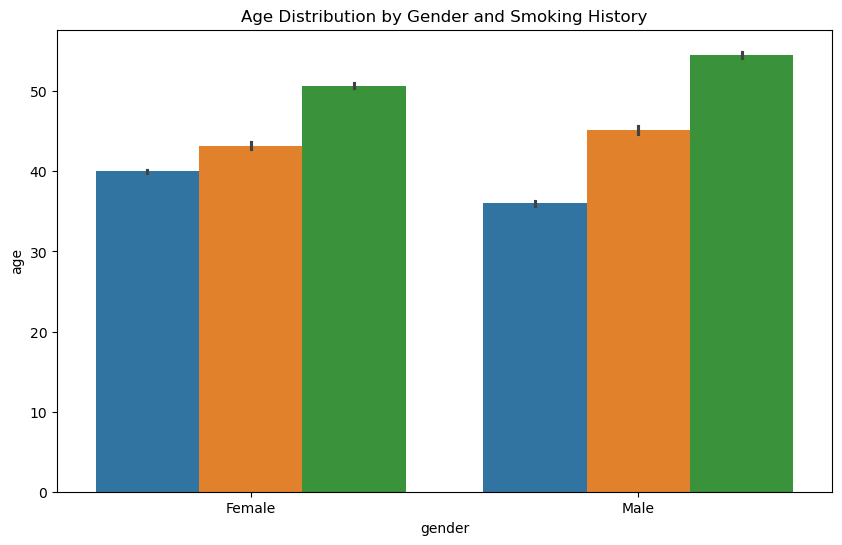

In [185]:
plt.figure(figsize=(10,6))
sns.barplot(x='gender', y='age', data=data, hue='smoking_history', legend=False)
plt.title("Age Distribution by Gender and Smoking History")
plt.show()

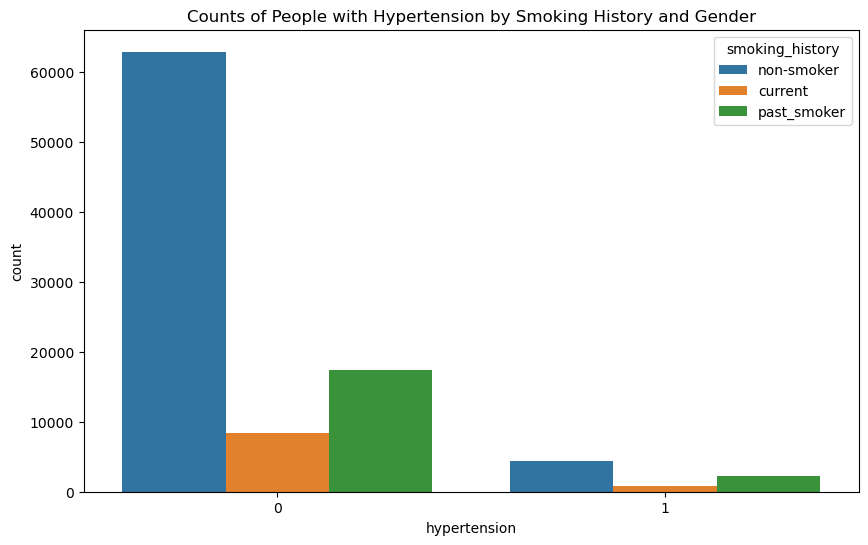

In [186]:
plt.figure(figsize=(10, 6))
sns.countplot(x='hypertension', hue='smoking_history', data=data, dodge=True)
plt.title("Counts of People with Hypertension by Smoking History and Gender")
plt.show()

In [187]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,non-smoker,25.19,6.6,140,0
1,Female,54.0,0,0,non-smoker,27.32,6.6,80,0
2,Male,28.0,0,0,non-smoker,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [188]:
def encode_categorical(df, columns):
    df_encoded = df.copy()
    label_encoders = {}

    for column in columns:
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df[column])
        label_encoders[column] = le

    return df_encoded, label_encoders

In [189]:
columns_to_encode = ['gender','smoking_history']
encoded_data, encoders = encode_categorical(data, columns_to_encode)

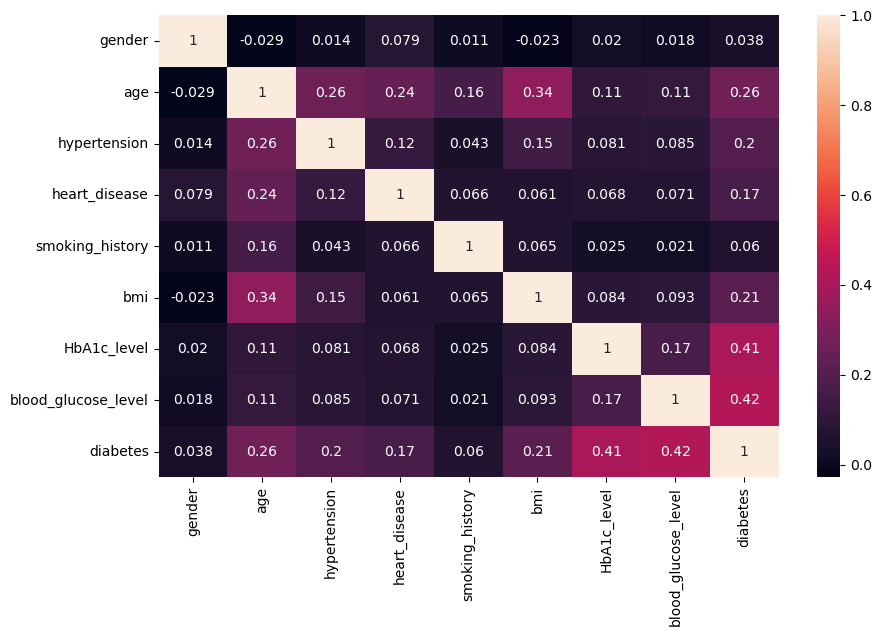

In [203]:
correlation_matrix = encoded_data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

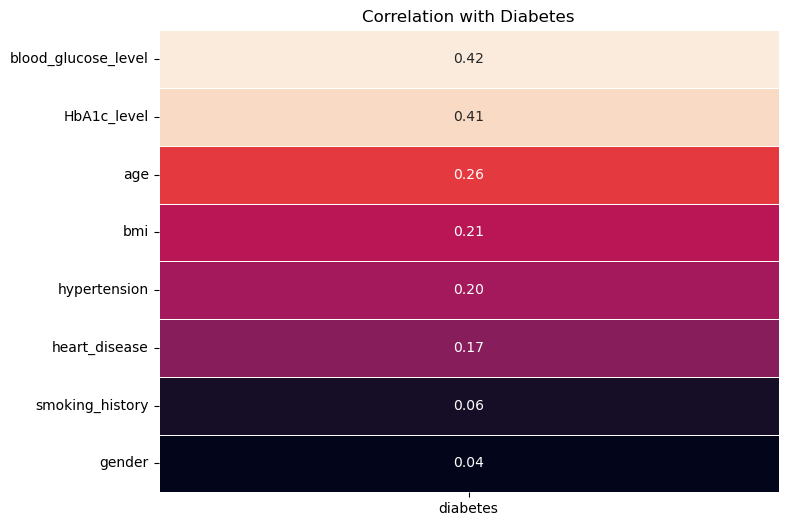

In [207]:
target_corr = correlation_matrix['diabetes'].drop('diabetes')
target_corr_sorted = target_corr.sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.heatmap(target_corr_sorted.to_frame(), annot=True, fmt='.2f', cbar=False, linewidths=.5)

plt.title('Correlation with Diabetes')
plt.show()